In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import librosa
import IPython.display as ipd
import librosa.display

from pathlib import Path

from threading import Thread

In [219]:
PATH = Path().parent
DDIR = PATH / 'dataset'
HAPPYDIR = DDIR / 'Happy'
SADDIR = DDIR / 'Sad'

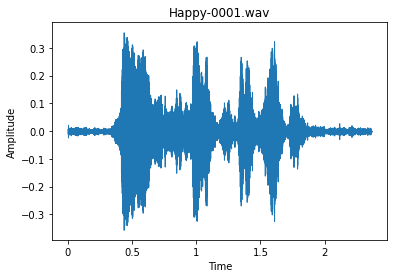

In [220]:
path = f'{HAPPYDIR}/happy-0001.wav'
audio_obj = ipd.Audio(path)
audio,sr = librosa.load(path)

librosa.display.waveshow(audio, sr=sr)
# plt.plot(audio)
plt.title(f'Happy-0001.wav')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()


In [221]:
len(np.linspace(0, len(audio)/sr, len(audio)))

52237

In [222]:
# t = np.linspace(0, 0.5,500)
# fft = np.fft.fft(audio)
# T = t[1] - t[0]  # sampling interval
# N = audio.size

# f = np.linspace(0, 1 / T, N)

# plt.ylabel('Amplitude')
# plt.xlabel('Frequency [Hz]')
# plt.bar(f[:N // 2], np.abs(fft)[:N // 2] * 1 / N, width=1.5)  # 1 / N is a normalization factor
# plt.show()



In [223]:
# plt.xlabel('Amplitude')
# plt.ylabel('Frequency [Hz]')
# plt.bar(np.abs(fft)[:N // 2] * 1 / N, f[:N // 2], width=1.5)  # 1 / N is a normalization factor
# plt.show()

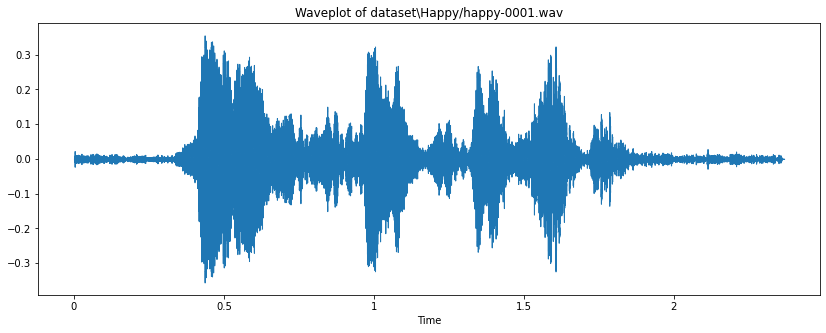

In [224]:
@lambda _:_(path)
def display_wave(audio_path:str=None)->ipd.Audio:
    au_obj = ipd.Audio(audio_path)
    audio, sr = librosa.load(audio_path)

    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Waveplot of {audio_path}')
    plt.show()
    
    return au_obj

# display_wave(path)

In [225]:
# @lambda _:_(path)
def amplitude_envelope(audio_path:str=None, frame_size:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_path)
    amplitude_envelope = np.array([max(signal[i:i+frame_size]) for i in range(0, len(signal), hop_len)])

    frames = range(0, len(amplitude_envelope))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, amplitude_envelope, color='r')
        plt.title(f'Amplitude Envelope of {audio_path}')
        plt.show()
    return amplitude_envelope

In [226]:
# @lambda _:_(path)
def root_mean_squared(audio_path:str=None, frame_size:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_path)
    rms_energy = librosa.feature.rms(y=signal, frame_length=frame_size, hop_length=hop_len)[0]

    frames = range(0, len(rms_energy))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, rms_energy, color='r')
        plt.title(f'Root Mean Squared Energy of {audio_path}')
        plt.show()
    return rms_energy

In [227]:
# @lambda _:_(path)
def zero_crossing_rate(audio_path:str=None, frame_size:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_path)
    zcr = librosa.feature.zero_crossing_rate(y=signal, frame_length=frame_size, hop_length=hop_len)[0]

    frames = range(0, len(zcr))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        librosa.display.waveshow(signal, alpha=0.5)
        plt.plot(times, zcr, color='r')
        plt.title(f'Zero Crossing Rate of {audio_path}')
        plt.show()
    return zcr

In [228]:
# @lambda _:_(path)
def spectral_centroid(audio_path:str=None, frame_size:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_path)
    spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=sr, n_fft=frame_size, hop_length=hop_len)[0]

    frames = range(0, len(spectral_centroids))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        plt.plot(times, spectral_centroids, color='r')
        plt.title(f'Spectral Centroid of {audio_path}')
        plt.xlabel('Time')
        plt.show()
    return spectral_centroids

In [229]:
# @lambda _:_(path)
def spectral_bandwidth(audio_path:str=None, frame_size:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_path)
    spectral_bandwidth_ = librosa.feature.spectral_bandwidth(y=signal, sr=sr, n_fft=frame_size, hop_length=hop_len)[0]

    frames = range(0, len(spectral_bandwidth_))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        plt.plot(times, spectral_bandwidth_, color='r')
        plt.title(f'Spectral Bandwidth of {audio_path}')
        plt.xlabel('Time')
        plt.show()
    return spectral_bandwidth_

In [230]:
# @lambda _:_(path)
def band_energy_ratio(audio_obj:str=None, frame_size:int=2048, hop_len:int=512, split_frequency:int=2000, visualize:bool=True):
    signal, sr = librosa.load(audio_obj)
    signal_stft = librosa.stft(y=signal, n_fft=frame_size, hop_length=hop_len)
    frequency_range = sr / 2
    frequency_delta_per_bin = frequency_range / signal_stft.shape[0]
    split_frequency_bin = int(np.floor(split_frequency / frequency_delta_per_bin))

    power_spectrum = np.abs(signal_stft**2).T
    band_energy_ration:list = []
    for freq_in_frame in power_spectrum:
        low_freq_sum = np.sum(freq_in_frame[:split_frequency_bin])
        high_freq_sum = np.sum(freq_in_frame[split_frequency_bin:])
        frame_bar = low_freq_sum / high_freq_sum
        band_energy_ration.append(frame_bar)

    band_energy_ration = np.array(band_energy_ration)
    
    frames = range(0, len(band_energy_ration))
    times = librosa.frames_to_time(frames, hop_length=hop_len)

    if visualize:
        plt.figure(figsize=(14, 5))
        plt.plot(times, band_energy_ration, color='r')
        plt.title(f'Band Energy Ratio of {audio_obj}')
        plt.xlabel('Time')
        plt.show()
    return band_energy_ration



In [231]:
# @lambda _:_(path)
def frequency_spectogram(audio_obj:str=None, frame_rate:int=2048, hop_len:int=512, visualize:bool=True):
    signal, sr = librosa.load(audio_obj)
    signal_stft = librosa.stft(y=signal, n_fft=frame_rate, hop_length=hop_len)
    spectrum = np.abs(signal_stft)**2
    db_spectrum = librosa.power_to_db(spectrum)

    # signal_stft_db = librosa.amplitude_to_db(np.abs(signal_stft))

    if visualize:
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(db_spectrum, sr=sr, hop_length=hop_len, x_axis='time', y_axis='hz')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Frequency Spectogram of {audio_obj}')
        plt.show()
    return db_spectrum

In [232]:
# @lambda _:_(path)
def mel_spectogram(audio_obj:str=None, frame_rate:int=2048, hop_len:int=512, mel_band:int=90, visualize:bool=True):
    signal, sr = librosa.load(audio_obj)
    mel_spectogram = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=frame_rate, hop_length=hop_len, n_mels=mel_band)
    db_mel_spectogram = librosa.power_to_db(mel_spectogram)

    if visualize:
        plt.figure(figsize=(14, 5))
        librosa.display.specshow(db_mel_spectogram, sr=sr, hop_length=hop_len, x_axis='time', y_axis='hz')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mel Spectogram of {audio_obj}')
        plt.show()
    return mel_spectogram

In [233]:
# @lambda _:_(path)
def mfcc(audio_obj:str=None, frame_rate:int=2048, hop_len:int=512, mfcc_num:int=25, visualize:bool=True):
    signal, sr = librosa.load(audio_obj)
    mfcc_spectrum = librosa.feature.mfcc(y=signal, sr=sr, n_fft=frame_rate, hop_length=hop_len, n_mfcc=mfcc_num)
    delta_1_mfcc = librosa.feature.delta(mfcc_spectrum, order=1)
    delta_2_mfcc = librosa.feature.delta(mfcc_spectrum, order=2)

    mfcc_features = np.concatenate((np.mean(mfcc_spectrum, axis=1), np.mean(delta_1_mfcc, axis=1), np.mean(delta_2_mfcc, axis=1)))

    if visualize:
        plt.figure(figsize=(14, 15))
        plt.subplot(3, 1, 1)
        librosa.display.specshow(mfcc_spectrum, sr=sr, hop_length=hop_len, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCC of {audio_obj}')

        plt.subplot(3, 1, 2)
        librosa.display.specshow(delta_1_mfcc, sr=sr, hop_length=hop_len, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCC Delta 1 of {audio_obj}')

        plt.subplot(3, 1, 3)
        librosa.display.specshow(delta_2_mfcc, sr=sr, hop_length=hop_len, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCC Delta 2 of {audio_obj}')

        plt.tight_layout()
        plt.show()
    return mfcc_features
    

In [234]:
import os
from tqdm import tqdm
from threading import Thread

# @lambda _:_(path)
def audio_features(path:str=None, frame_size:int=2048, hop_len:int=512, mfcc_num:int=20):
    audios_mfcc, audios_zcr, audios_rmse, audios_label = [],[],[],[]
    
    audio_files = os.listdir(path)
    for audio_name in tqdm(audio_files):
        # print(f'{path}/{audio_name}')
        mfcc_score = mfcc(audio_obj=f'{path}/{audio_name}', frame_rate=frame_size, hop_len=hop_len, mfcc_num=mfcc_num, visualize=False)
        zcr_score = np.mean(zero_crossing_rate(audio_path=f'{path}/{audio_name}', frame_size=frame_size, hop_len=hop_len, visualize=False))
        rmse_score = np.mean(root_mean_squared(audio_path=f'{path}/{audio_name}', frame_size=frame_size, hop_len=hop_len, visualize=False))
        
        audios_mfcc.append(mfcc_score)
        audios_zcr.append(zcr_score)
        audios_rmse.append(rmse_score)
        audios_label.append(audio_name.split('/')[0].split('-')[0])

    # print(len(audios_mfcc), len(audios_zcr), len(audios_rmse), len(audios_label))
    # print(audios_mfcc[0].shape, audios_zcr[0].shape, audios_rmse[0].shape)
    audio_features = np.column_stack((audios_mfcc, audios_zcr, audios_rmse))
    # print(audio_features.shape)
    df = pd.DataFrame(audio_features)
    df.insert(loc=0, column='name', value=audio_files)
    df['label'] = audios_label

    return df

In [235]:
print(HAPPYDIR)

dataset\Happy


In [236]:
df = audio_features(path=HAPPYDIR, mfcc_num=20)

100%|██████████| 1087/1087 [00:29<00:00, 36.95it/s]


In [237]:
df_sad = audio_features(path=SADDIR, mfcc_num=20)

100%|██████████| 1087/1087 [00:29<00:00, 37.16it/s]


<h1><font color='red'>NOTE! SAD NO 192 ERROR!</font></h1>

In [238]:
df_fix = pd.concat([df, df_sad])

In [239]:
df_fix.reset_index(drop=True, inplace=True)
df_fix

,name,0,1,2,3,4,5,6,7,8,...,53,54,55,56,57,58,59,60,61,label
0,happy-0001.wav,-314.457886,129.294830,-17.988623,33.474461,-11.482511,11.786289,-18.851305,11.302917,-13.167466,...,0.012040,0.005879,0.028319,-0.029148,-0.036382,0.008265,0.018841,0.060542,0.042121,happy
1,happy-0002.wav,-395.502869,136.012527,2.375357,54.128048,-7.307978,23.552362,-23.973137,14.294264,-10.774253,...,0.017362,-0.018477,0.002029,-0.007749,-0.017186,0.004380,-0.015457,0.056817,0.016707,happy
2,happy-0003.wav,-366.721985,132.242188,8.187970,50.447689,-0.746726,10.303167,-12.941866,3.299066,-12.599129,...,0.039773,0.000470,-0.001448,0.001151,-0.006098,0.003033,0.020679,0.046481,0.028754,happy
3,happy-0004.wav,-373.125977,141.114120,-5.783168,48.331936,-8.069846,11.951582,-14.797240,5.968352,-8.678324,...,-0.045382,0.015618,-0.041267,-0.058196,0.033287,0.041998,0.034715,0.052498,0.022308,happy
4,happy-0005.wav,-338.726593,132.259232,-8.114789,44.194748,-7.917725,5.655036,-16.220108,7.988503,-5.889780,...,0.004920,0.015511,0.024280,0.007318,0.057902,-0.003076,-0.043340,0.051477,0.036355,happy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,sad-1084.wav,-417.924408,139.764908,12.273930,52.263084,-17.304499,27.862864,-14.208331,12.585475,-16.029865,...,0.018113,0.007671,0.040276,-0.011110,-0.022177,0.020251,-0.014291,0.059745,0.013470,sad
2170,sad-1085.wav,-446.779114,138.702423,27.430937,46.717846,-11.167727,24.803400,-5.096362,12.582688,-7.809765,...,0.017133,-0.021457,-0.020824,-0.051119,-0.039315,-0.010041,-0.028530,0.038625,0.009433,sad
2171,sad-1086.wav,-441.363373,139.999771,16.188068,66.505608,-11.208609,26.212502,-17.580864,12.032382,-12.642308,...,0.039546,0.029427,0.037083,0.016093,0.018286,-0.032602,-0.004603,0.044205,0.011740,sad
2172,sad-1087.wav,-408.045013,138.958069,10.271755,55.551472,-16.234924,26.500011,-16.514378,11.222992,-13.605694,...,0.041527,0.007327,0.029200,-0.019093,-0.030070,-0.008891,-0.013268,0.069884,0.013570,sad


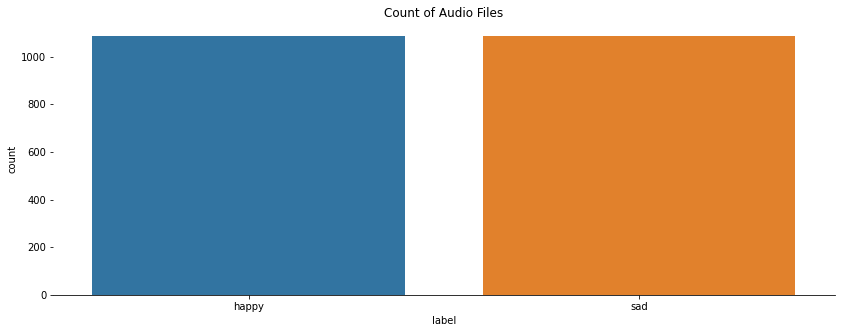

In [240]:
plt.figure(figsize=(14, 5))
sns.countplot(x='label', data=df_fix)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.title('Count of Audio Files')
plt.show()

In [241]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split as tts

X = df_fix.drop(['name', 'label'], axis=1)

scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

# X = np.expand_dims(X, axis=-1)

# scaler = StandardScaler()
# X = scaler.fit_transform(X)

y = np.array(df_fix['label'].apply(lambda x : 1 if x == 'happy' else 0))
# y = OneHotEncoder().fit_transform(df_fix['label'].values.reshape(-1, 1)).toarray()
# y = np.array(df_fix['label'].apply(lambda x : 1 if x == 'happy' else 0))

# y = np.reshape(y, (-1, 1))
# y = OneHotEncoder().fit_transform(y).toarray()

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [242]:
X

array([[0.86138563, 0.77344092, 0.31926824, ..., 0.63357637, 0.33849986,
        0.21604757],
       [0.77592856, 0.81362614, 0.56272286, ..., 0.5457379 , 0.31767479,
        0.08569523],
       [0.80627627, 0.79107199, 0.63221358, ..., 0.63828544, 0.25988327,
        0.14748358],
       ...,
       [0.7275714 , 0.83747781, 0.72785603, ..., 0.57353524, 0.24715421,
        0.06021612],
       [0.76270362, 0.83124635, 0.65712556, ..., 0.55134378, 0.3907297 ,
        0.06960547],
       [0.77376105, 0.81812031, 0.68771669, ..., 0.54443363, 0.39238747,
        0.08605105]])

In [243]:
scaler

MinMaxScaler()

In [244]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [245]:
from sklearn.svm import SVC
def svm_train(X_train, X_test, y_train, y_test, kernel:str='linear', C:float=1.0, gamma:str|int=None, dfs:str=None):
    svc = SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape=dfs, probability=True)
    svc.fit(X_train, y_train)
    y2 = svc.predict(X_test)
    return accuracy_score(y_test, y2)

In [246]:
def get_svm(X_train, X_test, y_train, y_test)->pd.DataFrame:
    df = pd.DataFrame(columns=['kernel', 'C', 'accuracy (%)','gamma','decision_function_shape'])
    list_gamma = [0.0001, 0.001, 0.1, 1, 'auto','scale']
    list_dfs = ['ovo','ovr']
    for a in tqdm(list_dfs):
        for x in [0.1, 1, 10, 100, 1000]:
            for y in ['linear', 'poly', 'rbf', 'sigmoid']:
                for z in list_gamma:
                    acc = svm_train(X_train, X_test, y_train, y_test, y, x, gamma=z, dfs=a)
                    df = df.append({'kernel': y, 'C': x, 'accuracy (%)': acc.round(2), 'gamma': z, 'decision_function_shape':a}, ignore_index=True)
    return df

In [247]:
get_svm_score = get_svm(X_train, X_test, y_train, y_test)

100%|██████████| 2/2 [04:48<00:00, 144.37s/it]


In [248]:
get_svm_score.sort_values(by='accuracy (%)', ascending=False, inplace=True)

In [249]:
get_svm_score['rank'] = np.arange(1,len(get_svm_score)+1)

In [250]:
get_svm_score_grouped = get_svm_score.groupby(['C','gamma','decision_function_shape','kernel'])['accuracy (%)','rank'].mean()

C:\Users\pande\AppData\Local\Temp\ipykernel_29668\494282444.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  get_svm_score_grouped = get_svm_score.groupby(['C','gamma','decision_function_shape','kernel'])['accuracy (%)','rank'].mean()


In [251]:
get_svm_score_grouped.to_excel(f'{DDIR}/output.xlsx')

In [252]:
get_svm_score.iloc[0]

kernel                      rbf
C                           1.0
accuracy (%)               0.86
gamma                         1
decision_function_shape     ovo
rank                          1
Name: 39, dtype: object

In [253]:
# from pandas.plotting import table
# ax = plt.subplot(111, frame_on=False)
# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)
# table(ax, accuracy_based_svm, loc='center')
# plt.savefig(f'{DDIR}/svm.png')
# # pd.DataFrame(get_svm_score_grouped)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       222
           1       0.84      0.86      0.85       213

    accuracy                           0.86       435
   macro avg       0.86      0.86      0.86       435
weighted avg       0.86      0.86      0.86       435

Accuracy : 85.52%


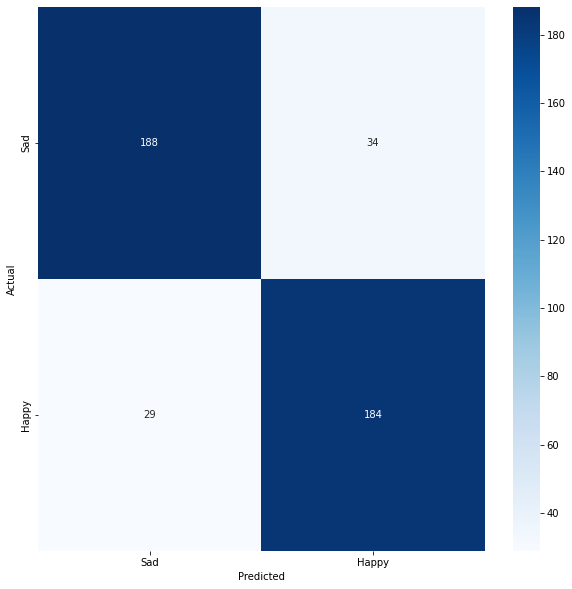

In [254]:
svm_score = SVC(kernel='rbf',C=1.0, gamma=1, decision_function_shape='ovo', probability=True)
svm_score.fit(X_train, y_train)
y_pred = svm_score.predict(X_test)
print(classification_report(y_test, y_pred))
print(f'Accuracy : {accuracy_score(y_test, y_pred).round(4)*100}%')
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.xticks([0.5,1.5], ['Sad', 'Happy'])
plt.yticks([0.5,1.5], ['Sad', 'Happy'])
plt.ylabel('Actual')
plt.show()

In [255]:
get_svm_score.head(5)

,kernel,C,accuracy (%),gamma,decision_function_shape,rank
39,rbf,1.0,0.86,1,ovo,1
159,rbf,1.0,0.86,1,ovr,2
182,rbf,10.0,0.85,0.1,ovr,3
173,linear,10.0,0.85,scale,ovr,4
168,linear,10.0,0.85,0.0001,ovr,5


In [256]:
#TODO : Test input

# INPUT_DIRECTORY = PATH / 'test_input'

# for file_directory in os.listdir(INPUT_DIRECTORY):
#     df = None
#     for files in tqdm(os.listdir(INPUT_DIRECTORY / file_directory)):
#         if(df is None):
#             df = audio_features(path=INPUT_DIRECTORY / file_directory / files, mfcc_num=20)
#         else:
#             input_df = audio_features(path=INPUT_DIRECTORY / file_directory / files, mfcc_num=20)
#             df = pd.concat([df, input_df])


# data1 = audio_features(path=HAPPYDIR, mfcc_num=20)
# data2 = audio_features(path=SADDIR, mfcc_num=20)

# df = pd.concat([data1, data2])

df = audio_features(path=f'C:\\NGODING\\Python\\PDM\\IPYNB-Code\\Final-Project\\dataset\\Sad', mfcc_num=20)
df

100%|██████████| 1087/1087 [00:19<00:00, 56.41it/s]


,name,0,1,2,3,4,5,6,7,8,...,53,54,55,56,57,58,59,60,61,label
0,sad-0001.wav,-449.421448,147.722198,-9.568405,51.008968,-2.845276,30.098743,-21.938202,16.471954,-9.312573,...,0.015455,0.010064,0.046255,-0.007867,0.005211,0.005756,0.006339,0.045294,0.008083,sad
1,sad-0002.wav,-394.924377,111.003624,26.793255,36.478493,1.580411,13.909044,-0.715320,1.693681,-9.720222,...,-0.008995,-0.056301,-0.058274,-0.001582,-0.028761,0.005456,0.003881,0.050308,0.025227,sad
2,sad-0003.wav,-410.265503,120.917488,16.606253,58.323441,-13.436650,26.781693,-15.498982,12.669683,-6.486484,...,0.042320,0.031363,0.033479,0.025798,-0.006378,0.018226,0.021288,0.081349,0.011498,sad
3,sad-0004.wav,-457.037567,144.196213,16.820171,76.620232,-15.036819,39.247749,-21.616156,13.772663,-12.134874,...,0.021692,0.009023,0.023665,0.054623,0.007470,-0.025775,-0.039017,0.043415,0.008758,sad
4,sad-0005.wav,-432.509460,148.646072,10.928779,63.711994,-9.459482,28.708157,-16.011526,10.906192,-9.422980,...,0.082379,0.012239,0.029980,-0.025909,-0.009204,-0.012544,0.001674,0.033458,0.012231,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,sad-1084.wav,-417.924408,139.764908,12.273930,52.263084,-17.304499,27.862864,-14.208331,12.585475,-16.029865,...,0.018113,0.007671,0.040276,-0.011110,-0.022177,0.020251,-0.014291,0.059745,0.013470,sad
1083,sad-1085.wav,-446.779114,138.702423,27.430937,46.717846,-11.167727,24.803400,-5.096362,12.582688,-7.809765,...,0.017133,-0.021457,-0.020824,-0.051119,-0.039315,-0.010041,-0.028530,0.038625,0.009433,sad
1084,sad-1086.wav,-441.363373,139.999771,16.188068,66.505608,-11.208609,26.212502,-17.580864,12.032382,-12.642308,...,0.039546,0.029427,0.037083,0.016093,0.018286,-0.032602,-0.004603,0.044205,0.011740,sad
1085,sad-1087.wav,-408.045013,138.958069,10.271755,55.551472,-16.234924,26.500011,-16.514378,11.222992,-13.605694,...,0.041527,0.007327,0.029200,-0.019093,-0.030070,-0.008891,-0.013268,0.069884,0.013570,sad


In [257]:
df.reset_index(drop=True, inplace=True)

In [258]:
df

,name,0,1,2,3,4,5,6,7,8,...,53,54,55,56,57,58,59,60,61,label
0,sad-0001.wav,-449.421448,147.722198,-9.568405,51.008968,-2.845276,30.098743,-21.938202,16.471954,-9.312573,...,0.015455,0.010064,0.046255,-0.007867,0.005211,0.005756,0.006339,0.045294,0.008083,sad
1,sad-0002.wav,-394.924377,111.003624,26.793255,36.478493,1.580411,13.909044,-0.715320,1.693681,-9.720222,...,-0.008995,-0.056301,-0.058274,-0.001582,-0.028761,0.005456,0.003881,0.050308,0.025227,sad
2,sad-0003.wav,-410.265503,120.917488,16.606253,58.323441,-13.436650,26.781693,-15.498982,12.669683,-6.486484,...,0.042320,0.031363,0.033479,0.025798,-0.006378,0.018226,0.021288,0.081349,0.011498,sad
3,sad-0004.wav,-457.037567,144.196213,16.820171,76.620232,-15.036819,39.247749,-21.616156,13.772663,-12.134874,...,0.021692,0.009023,0.023665,0.054623,0.007470,-0.025775,-0.039017,0.043415,0.008758,sad
4,sad-0005.wav,-432.509460,148.646072,10.928779,63.711994,-9.459482,28.708157,-16.011526,10.906192,-9.422980,...,0.082379,0.012239,0.029980,-0.025909,-0.009204,-0.012544,0.001674,0.033458,0.012231,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,sad-1084.wav,-417.924408,139.764908,12.273930,52.263084,-17.304499,27.862864,-14.208331,12.585475,-16.029865,...,0.018113,0.007671,0.040276,-0.011110,-0.022177,0.020251,-0.014291,0.059745,0.013470,sad
1083,sad-1085.wav,-446.779114,138.702423,27.430937,46.717846,-11.167727,24.803400,-5.096362,12.582688,-7.809765,...,0.017133,-0.021457,-0.020824,-0.051119,-0.039315,-0.010041,-0.028530,0.038625,0.009433,sad
1084,sad-1086.wav,-441.363373,139.999771,16.188068,66.505608,-11.208609,26.212502,-17.580864,12.032382,-12.642308,...,0.039546,0.029427,0.037083,0.016093,0.018286,-0.032602,-0.004603,0.044205,0.011740,sad
1085,sad-1087.wav,-408.045013,138.958069,10.271755,55.551472,-16.234924,26.500011,-16.514378,11.222992,-13.605694,...,0.041527,0.007327,0.029200,-0.019093,-0.030070,-0.008891,-0.013268,0.069884,0.013570,sad


In [259]:
def prediction(model:object=None, df:pd.DataFrame=None):
    temp = df
    X = temp.drop(['name', 'label'], axis=1)
    # scaler = MinMaxScaler()
    X = scaler.transform(X)
    y = np.array(temp['label'].apply(lambda x : 1 if x == 'happy' else 0))
    y_pred = model.predict(X)
    print(classification_report(y, y_pred))
    fig = plt.figure(figsize=(10,10))
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.xticks([0.5,1.5], ['Sad', 'Happy'])
    plt.yticks([0.5,1.5], ['Sad', 'Happy'])
    plt.ylabel('Actual')
    plt.show()
    
    for i in range(len(y)):
        print('Prediction for {} : {}'.format(df['name'].iloc[i], 'happy' if y_pred[i]==1 else 'sad'))

c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1087
           1       0.00      0.00      0.00         0

    accuracy                           0.91      1087
   macro avg       0.50      0.45      0.48      1087
weighted avg       1.00      0.91      0.95      1087



c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\pande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


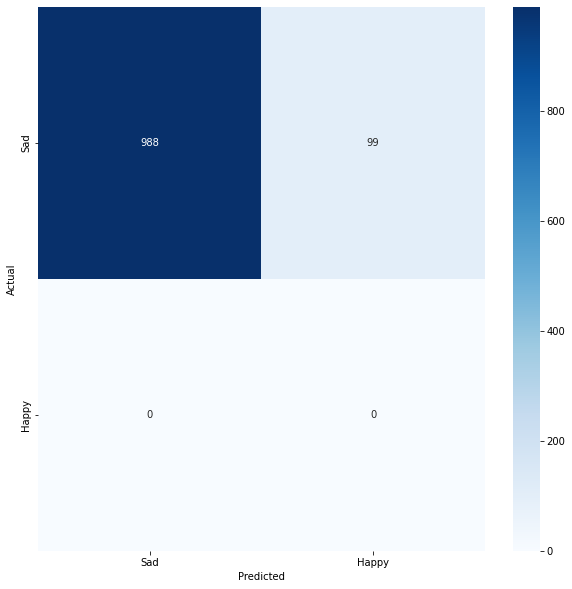

Prediction for sad-0001.wav : sad
Prediction for sad-0002.wav : happy
Prediction for sad-0003.wav : sad
Prediction for sad-0004.wav : sad
Prediction for sad-0005.wav : sad
Prediction for sad-0006.wav : happy
Prediction for sad-0007.wav : happy
Prediction for sad-0008.wav : sad
Prediction for sad-0009.wav : sad
Prediction for sad-0010.wav : happy
Prediction for sad-0011.wav : sad
Prediction for sad-0012.wav : sad
Prediction for sad-0013.wav : sad
Prediction for sad-0014.wav : sad
Prediction for sad-0015.wav : happy
Prediction for sad-0016.wav : sad
Prediction for sad-0017.wav : sad
Prediction for sad-0018.wav : sad
Prediction for sad-0019.wav : sad
Prediction for sad-0020.wav : sad
Prediction for sad-0021.wav : sad
Prediction for sad-0022.wav : happy
Prediction for sad-0023.wav : sad
Prediction for sad-0024.wav : sad
Prediction for sad-0025.wav : sad
Prediction for sad-0026.wav : happy
Prediction for sad-0027.wav : sad
Prediction for sad-0028.wav : sad
Prediction for sad-0029.wav : sad


In [260]:
prediction(svm_score, df)

# y_predict = svm_score.predict(df.drop(columns=['name','label'],inplace=False))

In [261]:
# y = np.array(df['label'].apply(lambda x : 1 if x == 'happy' else 0))

In [262]:
# X = df.drop(columns=['name','label'],axis=1)
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [263]:
# svm_score = SVC(kernel='rbf',C=1.0, gamma=1, decision_function_shape='ovo')
# from sklearn.model_selection import KFold

# acc_arr = np.empty((10,1))
# x=0

# kf = KFold(n_splits=10, shuffle=True)
# for train_index, test_index in kf.split(X,y):
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     svm_score.fit(X_train, y_train)
#     y_prediction = svm_score.predict(X_test)
#     print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_prediction)))
#     print("\n", classification_report(y_prediction, y_test))
    
#     # cnf_matrix = confusion_matrix(y_test, y_prediction)
#     # plt.figure(figsize=(10,10))
#     # acc_arr.append(accuracy_score(y_test,y_prediction))
#     acc_arr[x] = accuracy_score(y_test,y_prediction)
#     x+=1

# print("%0.2f accuracy with a standard deviation of %0.2f" %(acc_arr.mean(), acc_arr.std()))

In [264]:
# prediction(svm_score, df)

In [265]:
# y = list(map(lambda x : 1 if x == 'happy' else 0, df['label']))

In [266]:
# np.unique(y, return_counts=True)

In [267]:
# from sklearn.model_selection import cross_val_score, cross_validate

# # scores = cross_validate(estimator=svm_score, X=X, y=y, cv=10, scoring=['accuracy','precision','recall','f1'], return_train_score=True)
# scores = cross_val_score(estimator=svm_score, X=X, y=y, cv=10, scoring='accuracy')

In [268]:
# scores.mean()

In [269]:
# scores['test_accuracy'].mean()

In [270]:
#TODO : Save model

import joblib
filename = 'svm_model_kelompok_dimas_pande_wahyu.joblib'
joblib.dump(svm_score, filename=filename)

scalername = 'svm_scaler_kelompok_dimas_pande_wahyu.joblib'
joblib.dump(scaler, filename=scalername)

['svm_scaler_kelompok_dimas_pande_wahyu.joblib']

In [271]:
import pickle
pickle.dump(svm_score, open('svm_model_kelompok_dimas_pande_wahyu.pkl', 'wb'))

pickle.dump(scaler, open('svm_scaler_kelompok_dimas_pande_wahyu.pkl', 'wb'))

In [272]:
#TODO : Load model

# load_model = joblib.load(filename=filename)
# result = load_model.score(X_test, y_test)
# predict = load_model.predict(X_test)
# print(result)
# print(predict)

In [273]:
# import tensorflow
# from tensorflow import keras
# from tensorflow.keras import layers
# import keras_tuner as kt

In [274]:
# def build_model(hp):
#     model = keras.Sequential()
#     model.add(layers.InputLayer(input_shape=(X_train.shape[1],1)))
#     model.add(layers.Conv1D(filters=hp.Choice('filters', [16,32,64])
#                                              ,kernel_size=3
#                                              ,activation='relu'
#                                              ,kernel_initializer='he_normal'
#                                              ,padding='same'))
#     model.add(layers.MaxPooling1D(3, padding='same'))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Flatten())
#     for i in range(hp.Int('num_layers', 3, 6)):
#         model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))
#         model.add(layers.BatchNormalization())

#     model.add(layers.Dense(2, activation='sigmoid'))
#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     return model

In [275]:
# tuner = kt.Hyperband(hypermodel=build_model,
#                      objective='val_accuracy',
#                      max_epochs=100,
#                      factor=3,
#                      hyperband_iterations=3,
#                      seed=42,
#                      overwrite=True)

In [276]:
# len(y_train)

In [277]:
# tuner.search(x=X_train,
#              y=y_train,
#              validation_split=0.2,
#              callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)], 
#              epochs=30         
#             )

In [278]:
# best_hp = tuner.get_best_hyperparameters()[0]
# final_model = tuner.hypermodel.build(best_hp)

# final_model_history = final_model.fit(x=X_train,
#                                       y=y_train,
#                                       validation_split=0.2,
#                                       callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],
#                                       epochs=50)

In [279]:
# y_predict = final_model.predict(X_test)
# matrix = confusion_matrix(y_test, np.argmax(y_predict, axis=1))
# plt.figure(figsize=(10,10))
# ax = sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
# plt.show()

In [280]:
# check_num = 8

# print(y_test[check_num])

# final_model.predict(X_test[check_num].reshape(1, -1, 1))